In [1]:
import numpy as np
#%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import cm
from numpy import linalg as LA
import math

def create_vector(a,b,step):
    new_vec = []
    curr_val = a
    while curr_val < b:
        new_vec.append(curr_val)
        curr_val += step
        
    return new_vec

In [2]:
a_1 = 2
a_2 = 4
a_3 = 7
a_4 = 9
sigma_1 = 1

In [3]:
X_1 = np.random.normal(a_1, 1, 1000)
X_2 = np.random.normal(a_2, 0.7, 500)
X_3 = np.random.normal(a_3, sigma_1, 200)
X_4 = np.random.normal(a_4, sigma_1, 100)

X = np.concatenate((X_1, X_2, X_3, X_4), axis=0)

A = np.ones(len(X))

In [4]:
h = 0.5

def K(r): 
    return np.exp(-r ** 2 / 2)

def p(x,y):
    return K(LA.norm(x - y) / h)
    
def f(x):
    
    my_sum = 0
    
    for a_i, x_i in zip(A, X):
        my_sum += a_i*p(x,x_i)
        
    return my_sum

In [5]:
D = create_vector(-2,12,0.01)
Y = [f(x) for x in D] 

In [6]:
def GaussFit(y):
    
    c = f(y)
        
    z = 0
    for a_i, x_i in zip(A, X):
        z += a_i * p(y,x_i) * x_i
        
    z /= c 
    
    b = c / p(z, y)
    
    return lambda x : b * p(z, x)

In [7]:
g = GaussFit(4)

In [8]:
Y_4 = [g(x) for x in D]

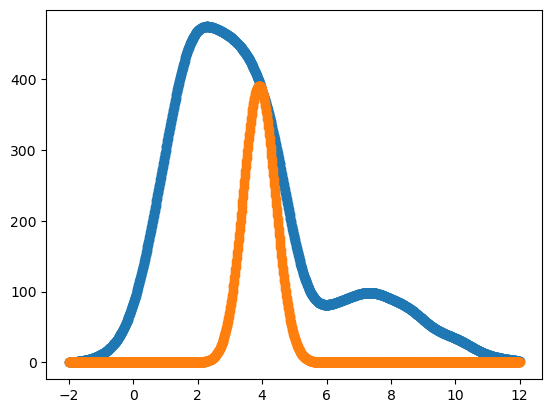

In [9]:
plt.scatter(D, Y)
plt.scatter(D, Y_4)
plt.show()

In [10]:
s = 0.6

In [11]:
def combined_gaussians(set_of_gaussians, x):
    
    max_val = 0
    for g in set_of_gaussians:
        max_val = max(max_val, g(x))
        
    return max_val

In [12]:
possible_landmarks = D
total_gaussians = []
prev_length = len(possible_landmarks) + 1

while( len(possible_landmarks) > 0 ):
    print(len(total_gaussians), len(possible_landmarks))
    Y = [f(y) - combined_gaussians(total_gaussians, y) for y in possible_landmarks]
    y_k = possible_landmarks[np.argmax(Y)]
    g_n =  GaussFit(y_k)
    total_gaussians.append(g_n)
    possible_landmarks = list(filter(lambda y : combined_gaussians(total_gaussians, y) < s*f(y), possible_landmarks))

0 1401
1 1296
2 1190
3 1083
4 1056
5 957
6 874
7 767
8 679
9 640
10 532
11 492
12 481
13 381
14 314
15 306
16 216
17 146
18 67
19 49


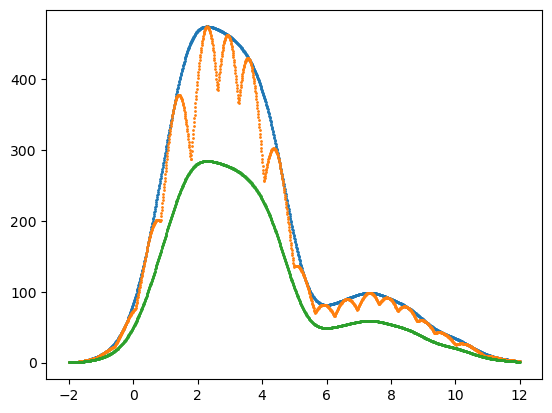

In [13]:
Y = [f(x) for x in D] 
Y_approx = [combined_gaussians(total_gaussians, x) for x in D]
sY = [s*f(x) for x in D] 

plt.scatter(D, Y, s=1)
plt.scatter(D, Y_approx, s=1)
plt.scatter(D, sY, s=1)
plt.show()